In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 
from pandas_datareader import data
from tqdm import tqdm
from sklearn.cluster import KMeans
'''

ModuleNotFoundError: No module named 'pandas_datareader'

In [53]:
# Criação da output que será usado nas etapas 3 e 4
diret = 'E://Faculdade//Semestre 11//Processamento de Sinais Financeiros//GitHub//Carteira-de-Investimentos-Processamento-de-Sinais-Financeiros//'


df = pd.read_csv(diret+'dados_ativos_escolhidos.csv', sep=';')
start_date = '2012-07-16'
end_date = '2015-07-16'


Symbols = df['Code'].unique()

output = None
sym=[]

for sy in Symbols: 
    try:
        if output is None:
            output = df.loc[df['Code']==sy][['Date','Adj Close']].copy()
            output.set_index('Date', inplace=True)
            sym.append(sy)
        else:
            temp = df.loc[df['Code']==sy][['Date','Adj Close']].copy()
            temp.set_index('Date', inplace=True)
            output=pd.concat([output,temp],axis=1)
            sym.append(sy)
    except:
        print("Erro "+sy)


output.columns=sym
output.head(10) # Tabela preparada para as etapas 3 e 4


,CMIG4,CPLE6,EQTL3,ELET3,NEOE3,MGLU3,COGN3,ABEV3,HAPV3,JBSS3,...,PETR4,B3SA3,BBDC4,ITUB4,ITSA4,BBAS3,BIDI4,BPAC11,BBSE3,BBDC3
2012-07-16,6.505030,2.034245,2.616094,7.864921,NaN,0.265298,1.621139,8.491171,NaN,4.451958,...,11.125620,2.439261,6.863262,8.834414,3.011066,9.675461,NaN,NaN,NaN,5.846967
2012-07-17,6.616502,2.055272,2.609509,7.951664,NaN,0.258250,1.621139,8.484163,NaN,4.389909,...,10.954893,2.472676,6.860952,8.758648,2.955691,9.601604,NaN,NaN,NaN,5.849352
2012-07-18,6.686813,2.049537,2.581520,7.951664,NaN,0.263606,1.621139,8.547218,NaN,4.459713,...,11.000420,2.492724,6.980718,8.967764,3.042216,10.271605,NaN,NaN,NaN,5.961565
2012-07-19,6.698823,2.013220,2.649021,8.119373,NaN,0.274320,1.621139,8.559828,NaN,4.459713,...,11.165457,2.541732,7.059022,9.140508,3.104513,10.498455,NaN,NaN,NaN,6.071391
2012-07-20,6.623365,1.953488,2.477799,7.951664,NaN,0.274602,1.621139,8.510787,NaN,4.320105,...,10.915060,2.416984,7.031387,9.107172,3.073364,10.509008,NaN,NaN,NaN,6.035579
2012-07-23,6.570194,1.925294,2.395480,7.755043,NaN,0.272064,1.621139,8.547218,NaN,4.009865,...,10.789859,2.352384,6.695134,8.849569,2.986840,10.313810,NaN,NaN,NaN,5.687000
2012-07-24,6.472448,1.931506,2.428407,7.668298,NaN,0.260505,1.621139,8.439325,NaN,3.947816,...,10.693118,2.392481,6.755014,9.149607,3.104513,10.392944,NaN,NaN,NaN,5.825478
2012-07-25,6.525602,1.908091,2.428407,7.662514,NaN,0.259378,1.621139,8.449136,NaN,3.846988,...,10.812624,2.405846,6.784956,9.213243,3.114897,10.155542,NaN,NaN,NaN,5.837418
2012-07-26,6.611355,1.925294,2.612801,7.587335,NaN,0.271783,1.621139,8.708356,NaN,3.940060,...,10.960586,2.517228,6.828712,9.467821,3.211804,10.862473,NaN,NaN,NaN,5.873228
2012-07-27,6.769134,1.980726,2.612801,7.587335,NaN,0.280522,1.621139,9.008207,NaN,4.304594,...,11.478454,2.648657,7.208726,9.819383,3.357164,11.411139,NaN,NaN,NaN,6.147788


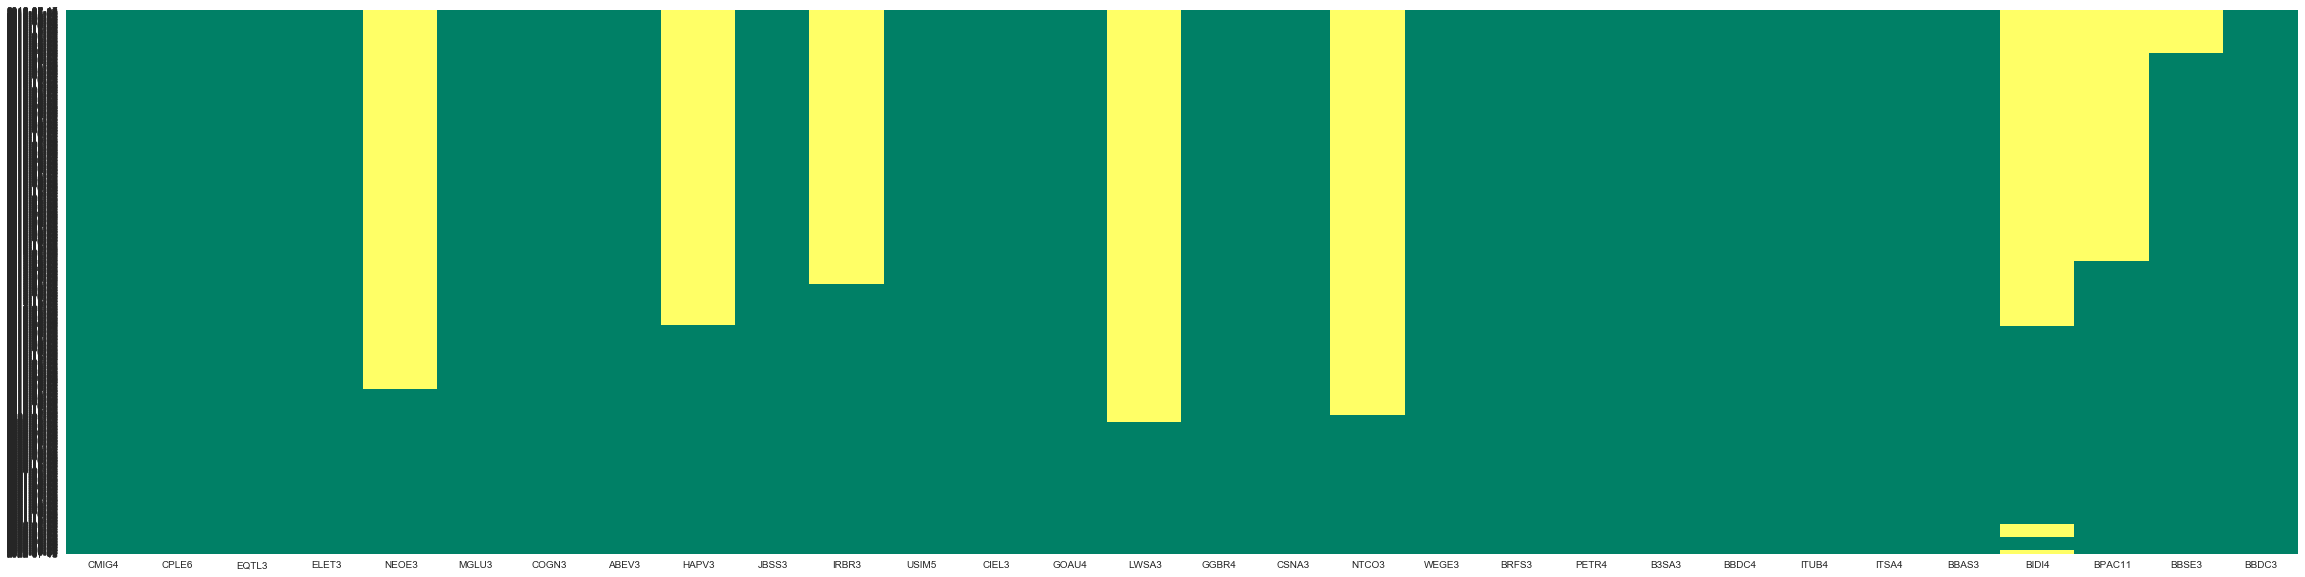

In [54]:
# Mapa dos erros nos títulos
%matplotlib inline
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(), cbar=False, cmap='summer')

In [62]:
# Títulos com mais de 5% de erro
test = output.isnull().sum()/(output.count()+output.isnull().sum())*100
test.loc[test>5].index

Index(['NEOE3', 'HAPV3', 'IRBR3', 'LWSA3', 'NTCO3', 'BIDI4', 'BPAC11',
       'BBSE3'],
      dtype='object')

['CMIG4',
 'NEOE3',
 'HAPV3',
 'IRBR3',
 'LWSA3',
 'NTCO3',
 'BBDC4',
 'ITUB4',
 'ITSA4',
 'BBAS3',
 'BIDI4',
 'BPAC11',
 'BBSE3',
 'BBDC3',
 'CPLE6',
 'CPLE6',
 'CPLE6']